# Implementing MLPs with Keras
## Building an Image Classifier Using the Functional API
### Using Keras to load the dataset

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# 1) Load & split the dataset
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]


In [18]:
print(X_train.shape)
print(y_train.shape)

print(X_train[0].shape)
print(y_train[0].shape)

print(y_test[0])

(55000, 28, 28)
(55000,)
(28, 28)
()
9


In [19]:
# 2) Normalize pixels to [0,1]
X_train = X_train.astype("float32") / 255.0
X_valid = X_valid.astype("float32") / 255.0
X_test  = X_test.astype("float32")  / 255.0

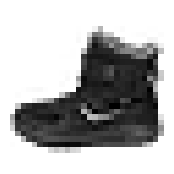

In [20]:
plt.figure(figsize=(2, 2))  # Smaller size
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [21]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [22]:
# 3) Functional‑API model definition
inputs = layers.Input(shape=(28, 28), name="input_image")

# -- Flatten image to vector
x = layers.Flatten(name="flatten")(inputs)

# -- (Optional) apply a normalization layer on the flattened vectors
normalizer = layers.Normalization(name="normalization")
# Must adapt on flattened training data:
normalizer.adapt(X_train.reshape(-1, 28*28))
x = normalizer(x)

# -- Hidden MLP layers
x = layers.Dense(300, activation="relu", name="hidden_dense_1")(x)
x = layers.Dense(100, activation="relu", name="hidden_dense_2")(x)

# -- Output layer: 10 classes with softmax
outputs = layers.Dense(10, activation="softmax", name="output_probs")(x)

model = Model(inputs=inputs, outputs=outputs, name="mlp_fashion_mnist")

model.summary()

Model: "mlp_fashion_mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 normalization (Normalizati  (None, 784)               1569      
 on)                                                             
                                                                 
 hidden_dense_1 (Dense)      (None, 300)               235500    
                                                                 
 hidden_dense_2 (Dense)      (None, 100)               30100     
                                                                 
 output_probs (Dense)        (None, 10)                1010      
                                                 

In [23]:
# 4) Compile for classification
model.compile(
    optimizer="sgd",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)



In [24]:
# 5) Train
history = model.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_valid, y_valid)
)


Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5266 - accuracy: 0.8165 - val_loss: 0.4101 - val_accuracy: 0.8468
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3677 - accuracy: 0.8690 - val_loss: 0.3774 - val_accuracy: 0.8594
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3276 - accuracy: 0.8820 - val_loss: 0.3490 - val_accuracy: 0.8738
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3009 - accuracy: 0.8903 - val_loss: 0.3449 - val_accuracy: 0.8770
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2806 - accuracy: 0.8979 - val_loss: 0.3369 - val_accuracy: 0.8766
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2632 - accuracy: 0.9057 - val_loss: 0.3312 - val_accuracy: 0.8792
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2479 - accuracy: 0.9101 - val_loss: 0.3238 - val_accuracy:

In [25]:

# 6) Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")


313/313 [==============================] - 1s 2ms/step - loss: 0.4257 - accuracy: 0.8805

Test Accuracy: 0.8805


In [26]:

# 7) Predict on new samples
X_new = X_test[:5]
y_pred_probs = model.predict(X_new)
print(y_pred_probs.round(2))
y_pred = np.argmax(y_pred_probs, axis=1)

for i, (pred, true) in enumerate(zip(y_pred, y_test[:5])):
    print(f"Sample {i}: Predicted={pred}, True={true}")

1/1 [==============================] - 0s 56ms/step
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.06 0.   0.   0.   0.   0.   0.94 0.   0.   0.  ]]
Sample 0: Predicted=9, True=9
Sample 1: Predicted=2, True=2
Sample 2: Predicted=1, True=1
Sample 3: Predicted=1, True=1
Sample 4: Predicted=6, True=6


In [27]:
y_pred = y_pred_probs.argmax(axis=-1)
y_pred

array([9, 2, 1, 1, 6], dtype=int64)

In [28]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [29]:
y_new = y_test[:5]
y_new

array([9, 2, 1, 1, 6], dtype=uint8)